In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# csv파일 불러오기
- co2_emissions
    - 국가별 이산화탄소 배출량
    - 기간 : 1750-2020
    - 단위 : 백만톤
  
- co2_weekly
    - 주간 이산화탄소 농도
    - 기간 : 1974-2023
    - 단위 : ppm
    
- gdp
    - 국가별 gdp
    - 기간 : 1959-2022
    - 단위 : 백만달러
- gdp_growth
    - 국가별 gdp 성장률
    - 기간 : 1960-2021
    - 단위 : %

In [2]:
## [국가별 이산화탄소 배출량]
co2_emissions = pd.read_csv('국가별_co2 배출량.csv')
co2_emissions[:2]

,국가코드,국가명,기준연도,인구수,총배출량,석탄기반,시멘트기반,석유기반,가스기반,연소기반,기타산업,배출량성장률
0,AFG,Afghanistan,1949,7624058.0,0.015,0.015,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,7752117.0,0.084,0.021,NaN,0.063,NaN,NaN,NaN,0.07


In [3]:
## [주간 이산화탄소 농도]
co2_weekly = pd.read_csv('주간_co2 농도.csv')
co2_weekly[:2]

,기준연도,기준월,기준일,평균값,1800년_이후_증가값
0,1974,5,19,333.37,50.39
1,1974,5,26,332.95,50.05


In [4]:
## [국가별 gdp]
gdp = pd.read_csv('gdp.csv')
gdp[:2]

,국가명,국가코드,기준연도,gdp
0,Australia,AUS,1959,16613.0
1,Australia,AUS,1960,17574.0


In [5]:
## [국가별 gdp 성장률]
gdp_growth = pd.read_csv('gdp_성장률.csv')
gdp_growth[:2]

,국가명,국가코드,기준연도,gdp성장률
0,Australia,AUS,1960,2.482656
1,Australia,AUS,1961,1.294611


# 전처리
- 각 데이터프레임의 기준연도(월, 일) dtype 크기 변경
    int64 -> int16

In [6]:
co2_emissions = co2_emissions.astype({'기준연도': 'int16'})

In [7]:
co2_weekly = co2_weekly.astype({'기준연도': 'int16', '기준월': 'int16', '기준일': 'int16'})

In [8]:
gdp = gdp.astype({'기준연도': 'int16'})

# 분석

## [가설 1] 2020년 이산화탄소 배출 상위 5개국의 배출원별 배출량은 석탄기반, 석유기반, 기타산업기반순으로 많을 것이다.

In [9]:
co2_20 = co2_emissions.loc[co2_emissions.기준연도 == 2020].sort_values(by='총배출량', ascending=0)[1:6]

In [10]:
label = [i for i in co2_20.iloc[:, 5:-1].mean().sort_values(ascending=0).index]
label

['석탄기반', '석유기반', '가스기반', '시멘트기반', '기타산업', '연소기반']

### 배출량 상위 5개국 배출원별 합계

Text(0, 0.5, '배출량 (백만톤)')

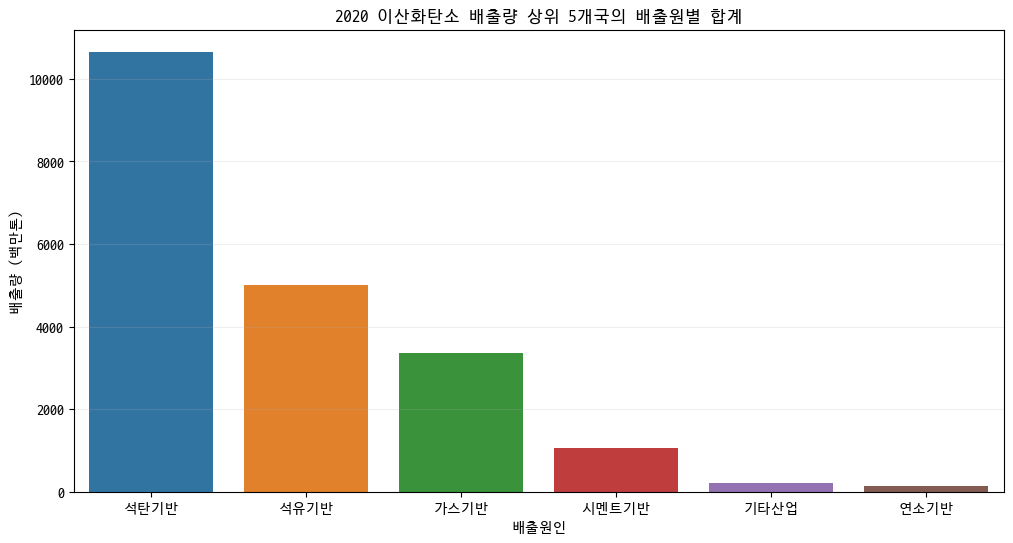

In [11]:
plt.rcParams['font.family'] = 'D2coding'

fig = sns.barplot(data=co2_20.iloc[:, 5:-1],
                  errorbar=None,
                  order=label,
                  estimator='sum'
                 )

fig.figure.set_size_inches(12, 6)
fig.set_title('2020 이산화탄소 배출량 상위 5개국의 배출원별 합계')

plt.grid(axis='y', alpha=0.2)

plt.xlabel('배출원인')
plt.ylabel('배출량 (백만톤)')

### 국가별 배출원별 배출량

In [12]:
co2_20_reason = co2_20[['석탄기반', '석유기반', '가스기반', '시멘트기반', '기타산업', '연소기반']].T
co2_20_reason.columns = co2_20.국가명

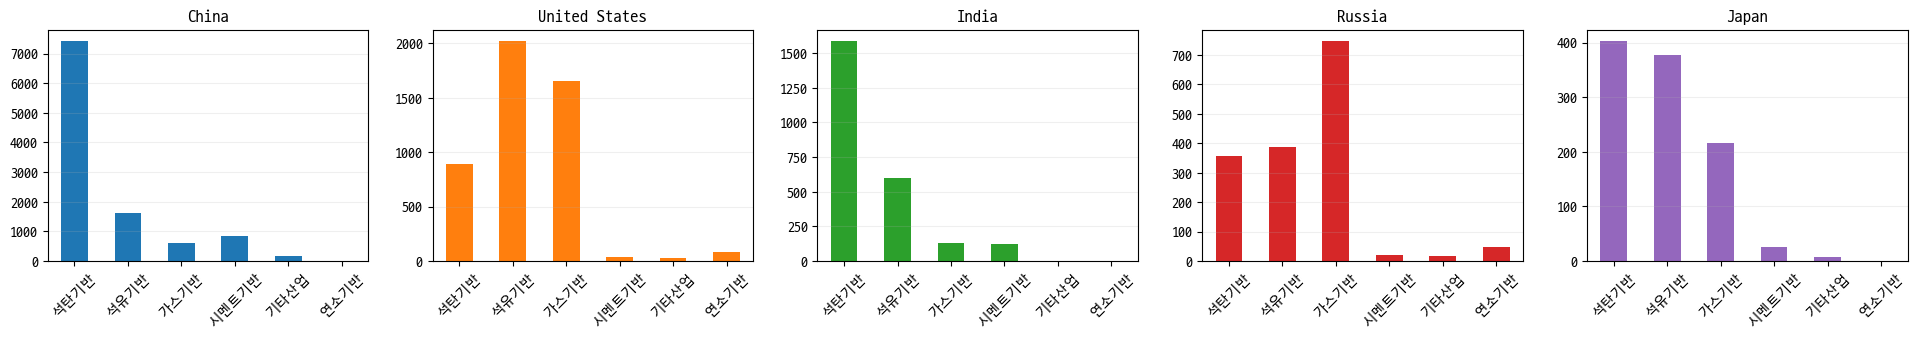

In [13]:
ax = co2_20_reason.plot(kind='bar',
                        figsize=[24, 3],
                        subplots=True,
                        layout=(1, 5),
                        legend=False,
                        rot=45
#                         sharey=True
                       )

# plt.title('2020 이산화탄소 배출량 상위 5개국의 배출원')

ax = ax.reshape(-1)
[ax[idx].grid(axis='y', alpha=0.2) for idx in range(len(ax))]

plt.show()

In [14]:
co2_20_reason

국가명,China,United States,India,Russia,Japan
석탄기반,7421.101,888.649,1587.552,356.946,402.979
석유기반,1611.762,2020.538,602.670,388.774,377.382
가스기반,605.254,1654.988,126.984,747.591,216.544
시멘트기반,858.233,40.795,122.908,20.306,25.376
기타산업,171.539,23.291,NaN,16.757,8.102
연소기반,NaN,84.510,1.678,46.762,0.393


**[가설 1] 2020년 이산화탄소 배출 상위 5개국의 배출원별 배출량은 석탄기반, 석유기반, 기타산업기반순으로 많을 것이다.**
- 상위 5개국의 배출원의 합계 중 가장 많은 양을 배출하는 원인은 석탄으로, 2020년 한 해동안 10657.277백만톤을 배출했고 이 중 7421.101백만톤은 중국에서 배출한 것으로 나타났다.
    - 그 다음으로는 석유가 5001.126백만톤으로 이 중 2020.538백만톤은 미국에서, 1611.762백만톤은 중국에서 배출했다.
    - 기타 산업으로 인한 배출량은 219.689백만톤으로 다른 배출원에 비해 적은 것으로 나타났다.
- 5개국 중 중국, 인도, 일본은 석탄으로 인한 배출량이 가장 많았으나 미국과 러시아는 각각 석유, 가스로 인한 배출량이 가장 많았다.

## [가설 2] 이산화탄소 농도의 전년대비 증가율이 가장 높았던 연도에 중국, 미국, 러시아 배출량성장률이 증가했을 것이다.

### 이산화탄소 농도의 전년대비 증가율이 가장 높았던 연도

In [15]:
## [data] 연도별 이산화탄소 농도 평균
co2_y_m = co2_weekly.groupby('기준연도').평균값.mean().to_frame()

In [16]:
## [증감률 컬럼 추가]
co2_y_m['전년대비증감률'] = 0

In [17]:
## [증감률 컬럼에 값 추가]
for year in co2_y_m[1:].T:
    co2_y_m.loc[year, '전년대비증감률'] = (co2_y_m.T[year+1].평균값 - co2_y_m.T[year].평균값) / co2_y_m.T[year].평균값 * 100
    
    if year == 2022:
        break

In [18]:
co2_y_m.sort_values(by='전년대비증감률', ascending=0)

,평균값,전년대비증감률
기준연도,,
2015,401.020769,0.851241
1997,363.887500,0.818353
2018,408.746346,0.719649
2022,418.552692,0.692221
2012,394.068868,0.686276
1987,349.335000,0.676505
2002,373.474808,0.672788
2009,387.663077,0.624799
2019,411.687885,0.622578


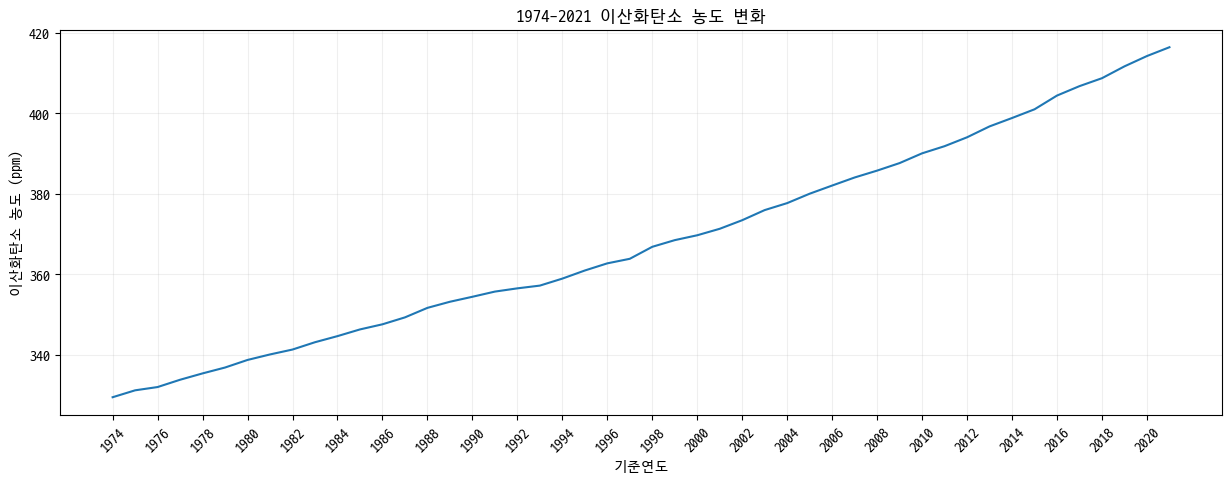

In [19]:
plt.rcParams['font.family'] = 'D2coding'

fig = sns.lineplot(data=co2_y_m[:-2], 
                   x=co2_y_m.index[:-2], 
                   y='평균값',
                  )

fig.figure.set_size_inches(15, 5)
fig.set_title('1974-2021 이산화탄소 농도 변화')

plt.grid(alpha=0.2)

fig.set_xticks(range(co2_y_m.index[0], co2_y_m.index[-2], 2))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

fig.set_ylabel('이산화탄소 농도 (ppm)')

plt.show()

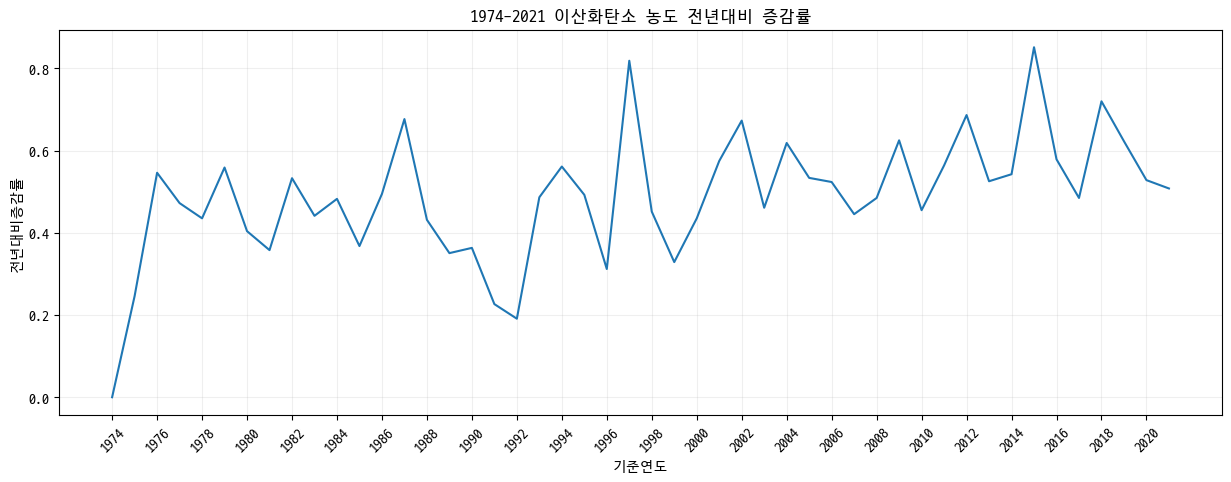

In [20]:
plt.rcParams['font.family'] = 'D2coding'

fig = sns.lineplot(data=co2_y_m[:-2], 
                   x=co2_y_m.index[:-2], 
                   y='전년대비증감률',
                  )

fig.figure.set_size_inches(15, 5)
fig.set_title('1974-2021 이산화탄소 농도 전년대비 증감률')

plt.grid(alpha=0.2)

fig.set_xticks(range(co2_y_m.index[0], co2_y_m.index[-2], 2))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.show()

가장 높은 증가율을 보였던 해는 2016년이다.

---
### 중국, 미국, 러시아의 배출량성장률

In [21]:
co2_c_g = co2_emissions[(co2_emissions.국가코드.isin(['USA', 'CHN', 'RUS'])) & (co2_emissions.기준연도 > 2009)]
co2_c_g

,국가코드,국가명,기준연도,인구수,총배출량,석탄기반,시멘트기반,석유기반,가스기반,연소기반,기타산업,배출량성장률
4051,CHN,China,2010,1.368811e+09,8616.653,6568.794,639.592,1092.572,199.585,NaN,116.110,730.120
4052,CHN,China,2011,1.376498e+09,9528.556,7309.786,708.564,1123.859,245.990,NaN,140.356,911.903
4053,CHN,China,2012,1.384206e+09,9775.622,7464.806,714.782,1176.712,277.599,NaN,141.722,247.066
4054,CHN,China,2013,1.391883e+09,9952.744,7493.454,748.323,1234.622,320.127,NaN,156.217,177.122
4055,CHN,China,2014,1.399454e+09,9985.583,7425.069,778.627,1263.073,353.591,NaN,165.223,32.840
4056,CHN,China,2015,1.406848e+09,9848.420,7266.979,721.995,1327.578,366.649,NaN,165.219,-137.164
4057,CHN,China,2016,1.414049e+09,9720.444,7071.406,743.044,1335.304,402.762,NaN,167.928,-127.976
4058,CHN,China,2017,1.421022e+09,9920.459,7137.264,758.185,1390.825,464.452,NaN,169.733,200.015
4059,CHN,China,2018,1.427648e+09,10289.990,7316.400,786.745,1495.473,519.834,NaN,171.539,369.530
4060,CHN,China,2019,1.433784e+09,10489.989,7377.670,826.876,1543.584,564.602,NaN,177.257,199.999


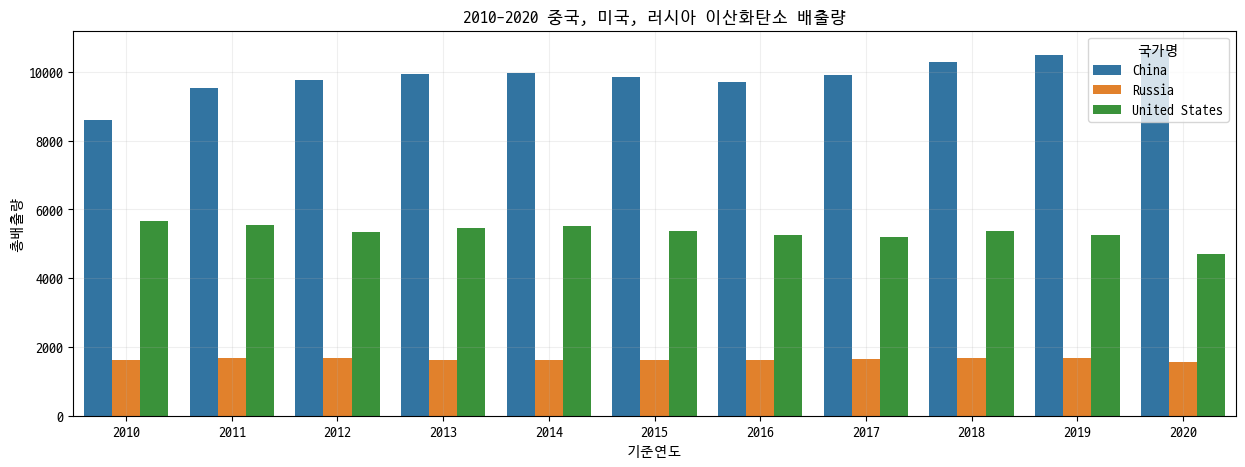

In [22]:
fig = sns.barplot(data=co2_c_g,
                   x='기준연도',
                   y='총배출량',
                   hue='국가명'
                  )

fig.figure.set_size_inches(15, 5)
fig.set_title('2010-2020 중국, 미국, 러시아 이산화탄소 배출량')

plt.grid(alpha=0.2)

# fig.set_xticks(range(2010, 2021, 1))

plt.show()

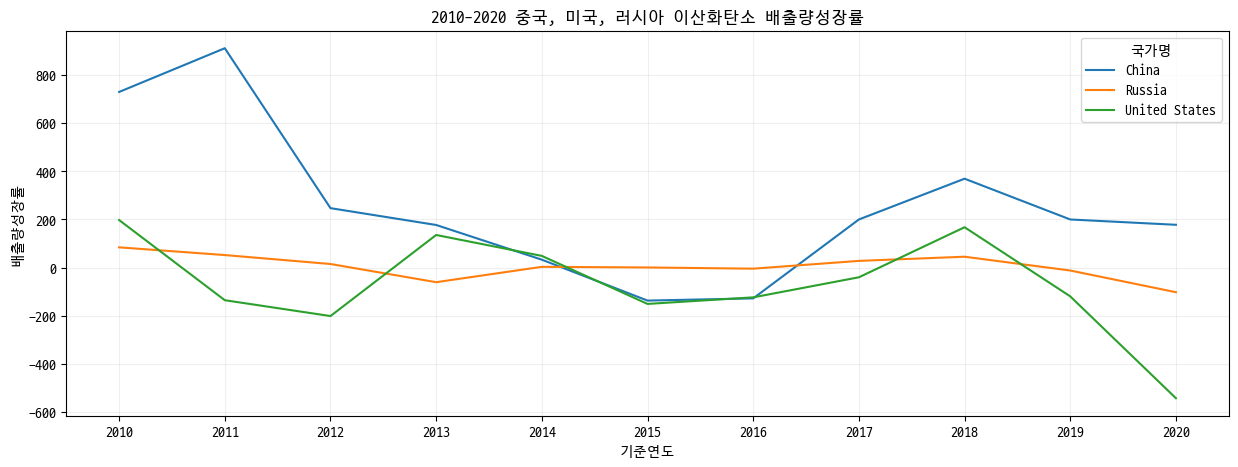

In [23]:
fig = sns.lineplot(data=co2_c_g,
                   x='기준연도',
                   y='배출량성장률',
                   hue='국가명'
                  )

fig.figure.set_size_inches(15, 5)
fig.set_title('2010-2020 중국, 미국, 러시아 이산화탄소 배출량성장률')

plt.grid(alpha=0.2)

fig.set_xticks(range(2010, 2021, 1))

plt.show()

In [24]:
co2_c_g.loc[co2_emissions.기준연도 == 2016].sort_values(by='배출량성장률', ascending=0)[:3]

,국가코드,국가명,기준연도,인구수,총배출량,석탄기반,시멘트기반,석유기반,가스기반,연소기반,기타산업,배출량성장률
15364,RUS,Russia,2016,1.452754e+08,1618.599,400.713,20.432,402.643,751.164,27.889,15.758,-4.501
20020,USA,United States,2016,3.230160e+08,5248.024,1379.744,39.439,2246.524,1502.475,51.908,27.933,-123.747
4057,CHN,China,2016,1.414049e+09,9720.444,7071.406,743.044,1335.304,402.762,NaN,167.928,-127.976


In [25]:
co2_emissions.loc[co2_emissions.기준연도 == 2016].sort_values(by='배출량성장률', ascending=0)[:3]

,국가코드,국가명,기준연도,인구수,총배출량,석탄기반,시멘트기반,석유기반,가스기반,연소기반,기타산업,배출량성장률
8743,IND,India,2016,1.324517e+09,2382.223,1530.271,123.281,613.166,113.622,1.883,NaN,113.656
14027,PAK,Pakistan,2016,2.036314e+08,207.019,24.662,14.127,97.931,70.298,NaN,NaN,37.767
9079,IRQ,Iraq,2016,3.661063e+07,194.361,NaN,3.493,142.537,14.286,34.046,NaN,28.715


**[가설 2] 이산화탄소 농도의 전년대비 증가율이 가장 높았던 연도에 중국, 미국, 러시아 배출량성장률이 증가했을 것이다.**
- 1974년부터 2021년까지 이산화탄소 농도의 전년대비 증가율이 가장 높았던 연도는 2016년으로, 전년대비 0.851% 증가한 404.434ppm으로 측정되었다. 1800년 이후 124.429ppm이 증가했다.
- 2016년 중국은 배출량성장률이 -127.976% 감소해 9720.444백만톤을 배출했고, 미국이 -123.747% 감소한 5248.024백만톤, 러시아가 -4.501% 감소한 1618.599백만톤을 배출했다.
---
배출량성장률이 가장 높았던 국가는 인도로 전년대비 82.712% 증가해 2382.223백만톤을 배출했다.  
다음으로 파키스탄이 37.767% 증가한 207.019백만톤, 이라크가 28.715% 증가한 194.361백만톤을 배출하였다.  
중국, 미국, 러시아의 배출량은 전년대비 감소하였으나, 미국과 중국은 당해 배출량성장률이 가장 높았던 인도의 2배 이상 많은 양을 배출한 것으로 나타났다.

## [가설 3] GDP 성장률이 오른 국가는 이산화탄소 배출량 또한 함께 증가했을 것이다.

In [26]:
gdp_growth.sort_values(by='gdp성장률', ascending=0)[:10]

,국가명,국가코드,기준연도,gdp성장률
1886,Ireland,IRL,2015,24.370445
2328,Saudi Arabia,SAU,1973,24.170529
2327,Saudi Arabia,SAU,1972,22.930640
2326,Saudi Arabia,SAU,1971,20.512217
2331,Saudi Arabia,SAU,1976,17.820974
2341,Saudi Arabia,SAU,1986,17.012746
2329,Saudi Arabia,SAU,1974,16.228065
2345,Saudi Arabia,SAU,1990,15.193426
712,China (People's Republic of),CHN,1984,15.192646
2346,Saudi Arabia,SAU,1991,15.007880


### 2010-2020 아일랜드의 GDP성장률과 이산화탄소 배출량 성장률

In [27]:
irl_gdp = gdp_growth.groupby('국가코드').get_group('IRL').loc[(gdp_growth.기준연도 > 2009) & (gdp_growth.기준연도 < 2021)]
irl_e = co2_emissions.groupby('국가코드').get_group('IRL').loc[(co2_emissions.기준연도 > 2009) & (co2_emissions.기준연도 < 2021)]

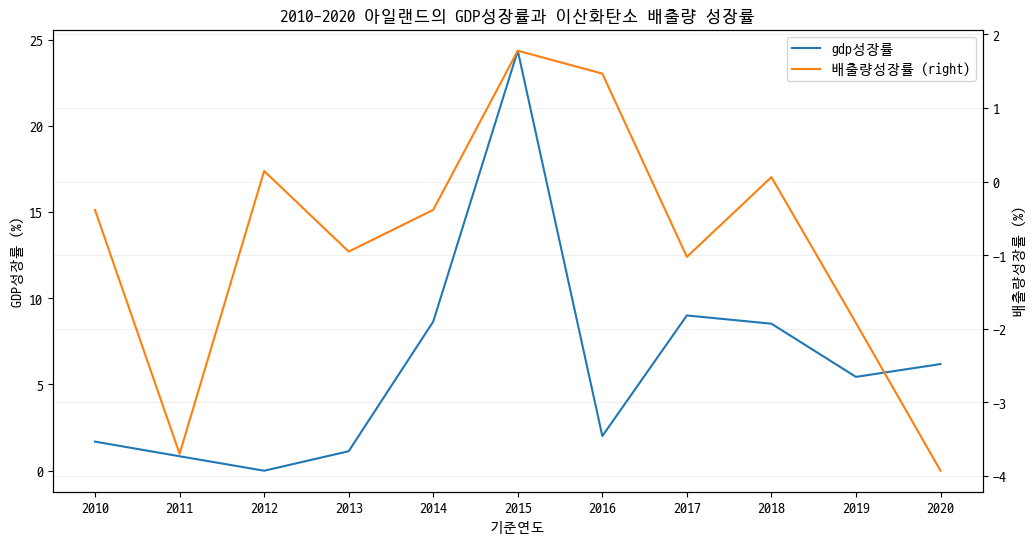

In [28]:
ax1 = irl_gdp.plot(figsize=(12, 6),
                   x='기준연도',
                   y='gdp성장률',
                   
                  )

ax2 = irl_e.plot(ax=ax1,
                 x='기준연도',
                 y='배출량성장률',
                 secondary_y=True,
                )

ax1.set_xticks(range(2010, 2021, 1))
ax1.set_title('2010-2020 아일랜드의 GDP성장률과 이산화탄소 배출량 성장률')

ax1.set_ylabel('GDP성장률 (%)')
ax2.set_ylabel('배출량성장률 (%)')

plt.grid(alpha=0.2)

plt.show()

### 1971-1980 사우디아라비아의 GDP성장률과 이산화탄소 배출량 성장률

In [29]:
sau_gdp = gdp_growth.groupby('국가코드').get_group('SAU').loc[gdp_growth.기준연도 < 1981]
sau_e = co2_emissions.groupby('국가코드').get_group('SAU').loc[(co2_emissions.기준연도 > 1970) & (co2_emissions.기준연도 < 1981)]

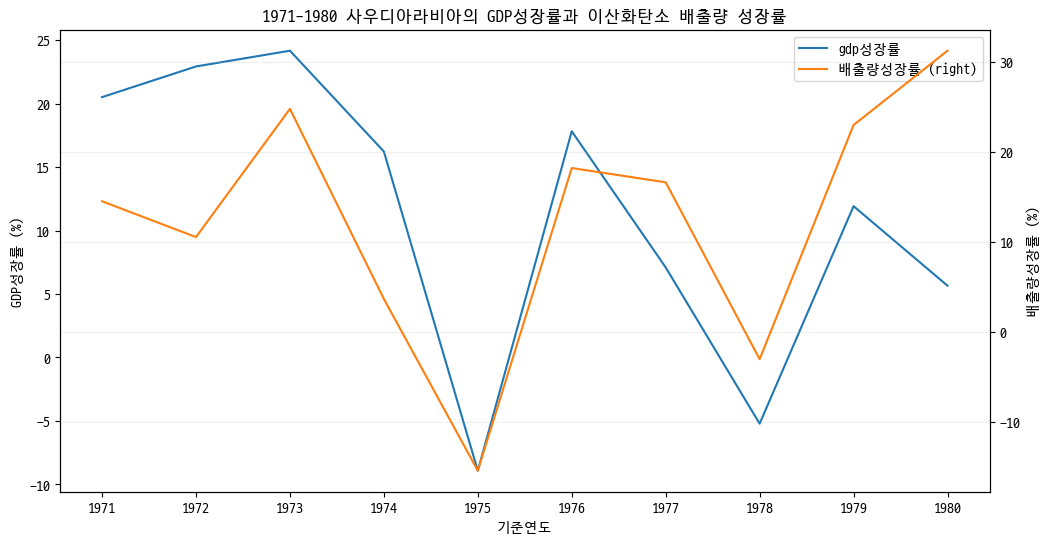

In [30]:
ax1 = sau_gdp.plot(figsize=(12, 6),
                   x='기준연도',
                   y='gdp성장률',
                   
                  )

ax2 = sau_e.plot(ax=ax1,
                 x='기준연도',
                 y='배출량성장률',
                 secondary_y=True,
                )

ax1.set_xticks(range(1971, 1981, 1))
ax1.set_title('1971-1980 사우디아라비아의 GDP성장률과 이산화탄소 배출량 성장률')

ax1.set_ylabel('GDP성장률 (%)')
ax2.set_ylabel('배출량성장률 (%)')

plt.grid(alpha=0.2)

plt.show()

### 1980-1990 중국의 GDP성장률과 이산화탄소 배출량 성장률

In [31]:
chn_gdp = gdp_growth.groupby('국가코드').get_group('CHN').loc[(gdp_growth.기준연도 > 1979) & (gdp_growth.기준연도 < 1991)]
chn_e = co2_emissions.groupby('국가코드').get_group('CHN').loc[(co2_emissions.기준연도 > 1979) & (co2_emissions.기준연도 < 1991)]

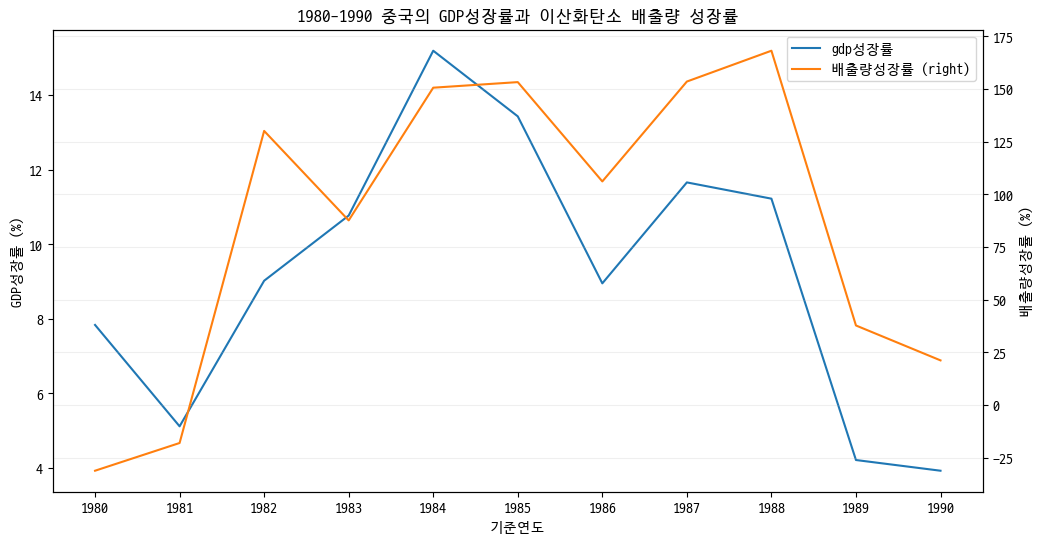

In [32]:
ax1 = chn_gdp.plot(figsize=(12, 6),
                   x='기준연도',
                   y='gdp성장률',
                   
                  )

ax2 = chn_e.plot(ax=ax1,
                 x='기준연도',
                 y='배출량성장률',
                 secondary_y=True,
                )

ax1.set_xticks(range(1980, 1991, 1))
ax1.set_title('1980-1990 중국의 GDP성장률과 이산화탄소 배출량 성장률')

ax1.set_ylabel('GDP성장률 (%)')
ax2.set_ylabel('배출량성장률 (%)')

plt.grid(alpha=0.2)

plt.show()

**[가설 3] GDP 성장률이 오른 국가는 이산화탄소 배출량 또한 함께 증가했을 것이다.**
- 2015년 아일랜드의 GDP는 전년대비 24.370% 상승했으며, 당해 이산화탄소 배출량성장률은 1.779% 증가했다.
- 1973년 사우디아라비아의 GDP는 24.170% 상승했으며, 배출량성장률은 24.772% 증가했다.
- 1984년 중국의 GDP는 15.192% 성장했으며, 배출량성장률은 150.611% 증가했다.
---
세 국가의 그래프로 보아 이산화탄소 배출과 경제 간 서로 영향을 주고받는 정도가 국가별으로 차이가 있긴 하나, 분명한 인과관계가 있음을 확인할 수 있다.